In [1]:
# import 
import pickle
import numpy as np
from scipy.stats import multivariate_normal
import pandas as pd
import pyarrow as pa
import matplotlib.pyplot as plt
from scipy.linalg import inv, sqrtm
from scipy.stats import norm
import seaborn as sns
import math
%matplotlib inline

# 7. Food expenditures in India 

### 1. Gaussian kernel

In [2]:
df = pd.read_parquet('nss68_total_expenditures.parquet')

In [5]:
# Gaussian kernel
sqrt2pi = np.sqrt(2 * np.pi)
k = lambda u: np.exp(-(u**2)/2) / sqrt2pi  

# estimator function
def kernel_estimator(X, h):
    """
    Use data X to estimate a density, using bandwidth h.
    """
    return lambda x: k((X - x) / h).mean() / h

# create total value array
total_value = df['total_value']
S = df['total_value']

# Specify the bandwidth 
h = 1000

# Create a range of values to plot the estimated density
x_range = np.linspace(total_value.min(), total_value.max(), 100)

# Create fhat
fhat = kernel_estimator(total_value, h)

# Evaluate estimated density for the range of values
density = np.array([fhat(x) for x in x_range])

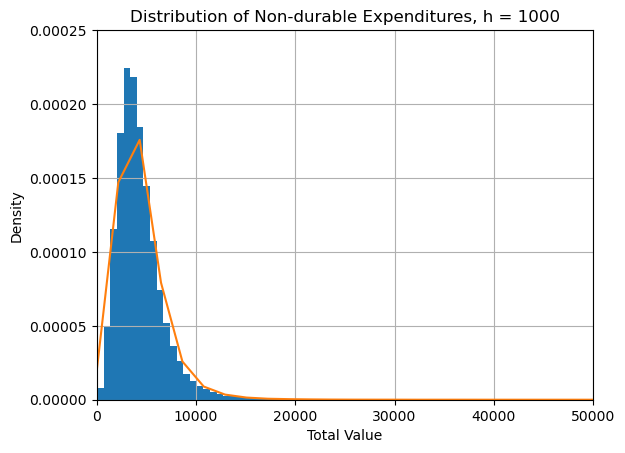

In [6]:
# plot histogram
S.hist(bins=int(np.sqrt(len(S))),density=True)

# Plot the estimated density
plt.plot(x_range, density)
plt.xlabel("Total Value")
plt.ylabel("Density")
plt.xlim(0, 50000)
plt.ylim(0, .00025)
plt.title("Distribution of Non-durable Expenditures, h = 1000")
plt.show()

In [11]:
## different bandwidth
# Specify the bandwidth h 
h_1000 = 10000

# Create a range of values to plot the estimated density
x_range = np.linspace(total_value.min(), total_value.max(), 100)

# Create the kernel density estimator function
fhat = kernel_estimator(total_value, h_1000)

# Evaluate the estimated density for the range of values
density = np.array([fhat(x) for x in x_range])

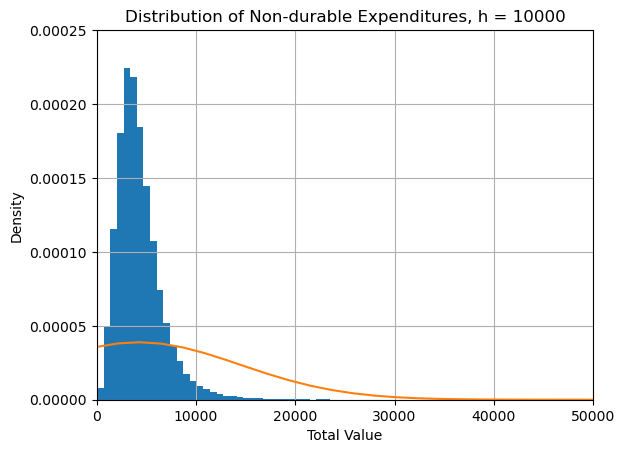

In [12]:
# plot 
S.hist(bins=int(np.sqrt(len(S))),density=True)

# Plot the estimated density
plt.plot(x_range, density)
plt.xlabel("Total Value")
plt.ylabel("Density")
plt.xlim(0, 50000)
plt.ylim(0, .00025)
plt.title("Distribution of Non-durable Expenditures, h = 10000")
plt.show()

In [13]:
## different bandwidth
# Silverman bandwidth
h_silv = S.std()*S.count()**(-1/5)*1.06

# Create a range of values to plot the estimated density
x_range = np.linspace(total_value.min(), total_value.max(), 100)

# Create the kernel density estimator 
fhat = kernel_estimator(total_value, h_silv)

# Evaluate the estimated density for the range of values
density = np.array([fhat(x) for x in x_range])

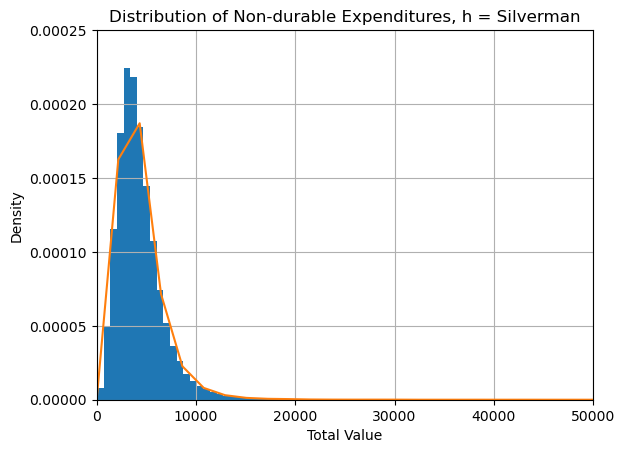

In [14]:
# plot 
S.hist(bins=int(np.sqrt(len(S))),density=True)

# Plot the estimated density
plt.plot(x_range, density)
plt.xlabel("Total Value")
plt.ylabel("Density")
plt.xlim(0, 50000)
plt.ylim(0, .00025)
plt.title("Distribution of Non-durable Expenditures, h = Silverman")
plt.show()

### 2. Inverse Jacobian rule

We want $$g(y)$$ where $$y=log(x)$$
•	Start with kernel density function of total expenditures 

•	Take the derivative of y with respect to x and apply inverse Jacobian rule 

$$g(y) = f(e^y)/e^y$$

### 3. Log 

In [28]:
# create log 
log_total_value = np.log(df['total_value'])  # Compute log of total value for each row
df['log_total_value'] = log_total_value  # Add new column to DataFrame

S_log = df['log_total_value']

# set h 
h_silv_log = S_log.std()*S_log.count()**(-1/5)*1.06

In [29]:
# Create a range of values to plot the estimated density
x_range = np.linspace(log_total_value.min(), log_total_value.max(), 100)

# Create the kernel density estimator function
fhat = kernel_estimator(log_total_value,h_silv_log) 

# Evaluate the estimated density for the range of values
density = np.array([fhat(x) for x in x_range])

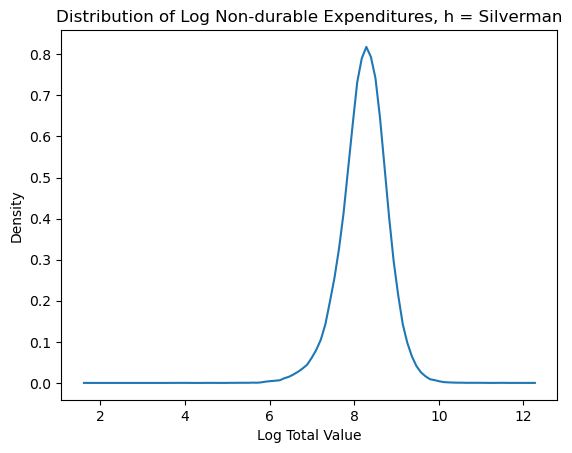

In [30]:
# Plot the estimated density
plt.plot(x_range, density)
plt.xlabel("Log Total Value")
plt.ylabel("Density")
plt.title("Distribution of Log Non-durable Expenditures, h = Silverman")
plt.show()